In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pt
import plotly.express as px
import pandas_profiling as pr

import sklearn.preprocessing as skp
import sklearn.model_selection as skm
import os
#import classification modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix 

In [ ]:
 !pip install pandas-profiling==2.7.1 
 

     |████████████████████████████████| 256kB 5.8MB/s 
     |████████████████████████████████| 3.1MB 48.5MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 604kB 45.8MB/s 
     |████████████████████████████████| 296kB 35.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=5c8040c5eda8bb35ce9d6006aaca50e32cfa1a661b14f7e7e9a44532ad8c5e56
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


  ***HEPATITUS DATASET***
  


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hepatitis.csv')
df.head()


class  age  sex  steroid  ...  sgot  albumin  protime  histology
0      2   30    2        1  ...    18      4.0       61          1
1      2   50    1        1  ...    42      3.5       61          1
2      2   78    1        2  ...    32      4.0       61          1
3      2   34    1        2  ...   200      4.0       61          1
4      2   34    1        2  ...    28      4.0       75          1

[5 rows x 20 columns]

***PANDA PROFILING***

In [ ]:
pr.ProfileReport(df).to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:361: UserWarning:

Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.



In [ ]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [ ]:
df["class"].replace((1,2),(0,1),inplace=True)
df["class"]=df["class"].astype("bool")

In [ ]:
df.describe()

age         sex     steroid  ...     albumin     protime   histology
count  142.000000  142.000000  142.000000  ...  142.000000  142.000000  142.000000
mean    40.816901    1.105634    1.514085  ...    3.830493   61.704225    1.443662
std     12.189182    0.308456    0.501571  ...    0.618103   17.696732    0.498575
min      7.000000    1.000000    1.000000  ...    2.100000    0.000000    1.000000
25%     32.000000    1.000000    1.000000  ...    3.500000   56.250000    1.000000
50%     39.000000    1.000000    2.000000  ...    3.900000   61.000000    1.000000
75%     50.000000    1.000000    2.000000  ...    4.200000   66.000000    2.000000
max     78.000000    2.000000    2.000000  ...    6.400000  100.000000    2.000000

[8 rows x 19 columns]

****GROUPING THE AGES****

In [ ]:
df["age"]=np.where((df["age"]>10) & (df["age"]<20),"Teenagers",
                   np.where((df["age"]>=20) & (df["age"]<=30),"Adults",
                   np.where((df["age"]>30) & (df["age"]<=40),"Middle Aged",np.where((df["age"]<=10),"Children",
                            "Old"))))

In [ ]:
df["age"]=pd.Categorical(df.age,["Children",'Teenagers','Adults', 'Middle Aged', 'Old'],ordered=True)

****BAR PLOTS****

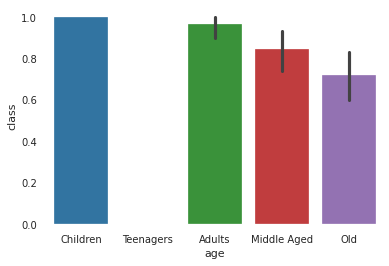

In [ ]:
# a bar plot of Age 
sns.barplot(x="age", y="class", data=df)
plt.show()

In [ ]:
df["sex"].replace((1,2),("Male","Female"),inplace=True)
df["sex"]=pd.Categorical(df.sex,["Male",'Female'],ordered=False)
df.head(30)

class          age     sex  steroid  ...  sgot  albumin  protime  histology
0    True       Adults  Female        1  ...    18     4.00       61          1
1    True          Old    Male        1  ...    42     3.50       61          1
2    True          Old    Male        2  ...    32     4.00       61          1
3    True  Middle Aged    Male        2  ...   200     4.00       61          1
4    True  Middle Aged    Male        2  ...    28     4.00       75          1
5   False          Old    Male        1  ...    85     3.81       61          1
6    True       Adults    Male        2  ...    85     3.81       61          1
7    True  Middle Aged    Male        2  ...    48     4.40       61          1
8    True       Adults    Male        2  ...   120     3.90       61          1
9    True  Middle Aged    Male        1  ...    30     4.40       85          1
10   True  Middle Aged    Male        2  ...   249     3.70       54          1
11   True          Old    Male        2  ...    60     3.90       52          1
12   True       Adults    Male        2  ...   144     4.90       78          1
13   True          Old    Male        1  ...    60     3.81       61          1
14   True  Middle Aged    Male        1  ...    89     2.90       46          1
15   True          Old    Male        2  ...    53     4.30       61          1
16   True  Middle Aged    Male        1  ...   166     4.00       63          1
17   True  Middle Aged    Male        2  ...    42     4.10       85          2
18   True  Middle Aged    Male        1  ...    28     4.20       62          1
19   True       Adults  Female        2  ...    20     4.20       64          1
20   True       Adults    Male        2  ...    98     4.10       39          1
21   True  Middle Aged    Male        2  ...    20     4.00      100          1
22   True          Old    Male        2  ...    63     4.70       47          1
23   True       Adults  Female        1  ...    18     4.30       70          1
24   True       Adults    Male        1  ...    46     3.80      100          1
25   True          Old    Male        1  ...    48     3.70       61          1
26   True          Old  Female        2  ...    55     2.70       36          1
27   True          Old    Male        1  ...    25     3.80      100          1
28   True          Old    Male        1  ...    58     4.60       52          1
29  False  Middle Aged    Male        1  ...    98     3.80       40          1

[30 rows x 20 columns]

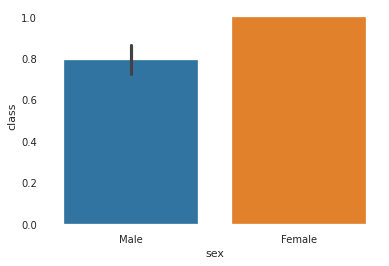

class                 bool
age               category
sex               category
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palable       int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [ ]:
# a bar plot 
sns.barplot(x="sex", y="class", data=df)
plt.show()


#updated data types

df.dtypes

**DUMMY CREATION**

In [ ]:
sep = pd.get_dummies(df,drop_first=True)
 
 #new columns
print(sep.columns)
sep.head(5)

Index(['class', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'age_Teenagers', 'age_Adults', 'age_Middle Aged',
       'age_Old', 'sex_Female'],
      dtype='object')


class  steroid  antivirals  ...  age_Middle Aged  age_Old  sex_Female
0   True        1           2  ...                0        0           1
1   True        1           2  ...                0        1           0
2   True        2           2  ...                0        1           0
3   True        2           2  ...                1        0           0
4   True        2           2  ...                1        0           0

[5 rows x 23 columns]

In [ ]:
y=sep["class"].copy()
X=sep.drop(columns=["class"])
print(y.shape)
print(X.shape)

(142,)
(142, 22)


**SCALING AND SPLITING**

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()

In [ ]:
scalex = scaler.fit_transform(X)


In [ ]:
Xtrain,Xtest, ytrain, ytest = train_test_split(scalex, y, test_size=.2, random_state=0)

In [ ]:
lrg=LogisticRegression()
lrg.fit(Xtrain,ytrain)
predictions = lrg.predict(Xtest)
acclrg=accuracy_score(ytest, predictions)*100
print("Accuracy of Logistic regression (%): \n",acclrg) 

Accuracy of Logistic regression (%): 
 96.55172413793103


**MODELS**

In [ ]:
knn = KNeighborsClassifier()
knn.fit(Xtrain,ytrain)
predictions = knn.predict(Xtest)
accknn=accuracy_score(ytest, predictions)*100
print("Accuracy of KNN (%): \n", accknn)

Accuracy of KNN (%): 
 93.10344827586206


In [ ]:
gnb=GaussianNB()
gnb.fit(Xtrain,ytrain)
predictions = gnb.predict(Xtest)
accgnb=accuracy_score(ytest, predictions)*100
print("Accuracy of Gaussian Naive Bayes (%): \n",accgnb) 

Accuracy of Gaussian Naive Bayes (%): 
 58.620689655172406


In [ ]:
svm=clf = SVC(gamma="auto",kernel='poly',degree=3)
svm.fit(Xtrain,ytrain)
predictions = svm.predict(Xtest)
accsvm=accuracy_score(ytest, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)  

Accuracy of Support Vector Machine (%): 
 93.10344827586206


In [ ]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(Xtrain,ytrain)
predictions = dt.predict(Xtest)
accdt=accuracy_score(ytest, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)  

Accuracy of Decision Tree (%): 
 89.65517241379311


In [ ]:
rf=RandomForestClassifier()
rf.fit(Xtrain,ytrain)
predictions = rf.predict(Xtest)
accrf=accuracy_score(ytest, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf) 

Accuracy of Random Forest (%): 
 93.10344827586206


In [ ]:
algos=["K Nearest Neighbor","Guassian Naive Bayes","Logistic Regression","Support Vector Machine","Decision Tree","Random Forrest"]
acc=[accknn,accgnb,acclrg,accsvm,accdt,accrf]
comp={"Algorithms":algos,"Accuracies":acc}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies"] ,ascending = False))


Algorithms  Accuracies
2     Logistic Regression   96.551724
0      K Nearest Neighbor   93.103448
3  Support Vector Machine   93.103448
5          Random Forrest   93.103448
4           Decision Tree   89.655172
1    Guassian Naive Bayes   58.620690

In [ ]:

y_head_lrg = lrg.predict(Xtest)
knnr = KNeighborsClassifier(n_neighbors = 3)
knnr.fit(Xtrain,ytrain)
y_head_knn = knnr.predict(Xtest)
y_head_gnb = gnb.predict(Xtest)
y_head_svm = svm.predict(Xtest)
y_head_dt = dt.predict(Xtest)
y_head_rfg = rf.predict(Xtest)

from sklearn.metrics import confusion_matrix

cm_lrg = confusion_matrix(ytest,y_head_lrg)
cm_knnr = confusion_matrix(ytest,y_head_knn)
cm_gnb = confusion_matrix(ytest,y_head_gnb)
cm_svm = confusion_matrix(ytest,y_head_svm)
cm_dt = confusion_matrix(ytest,y_head_dt)
cm_rfg = confusion_matrix(ytest,y_head_rfg)

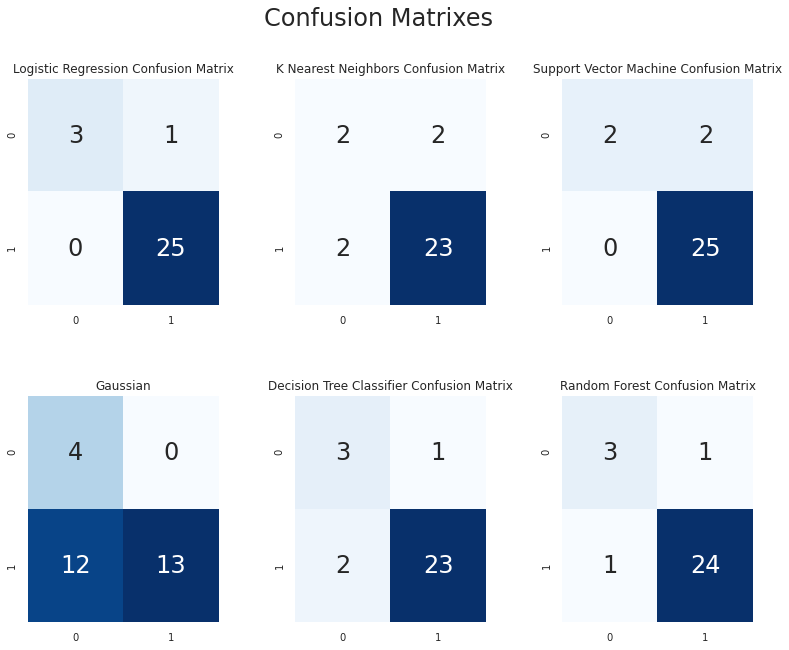

In [ ]:

plt.figure(figsize=(13,10))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knnr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,3,4)
plt.title("Gaussian")
sns.heatmap(cm_gnb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


As per my model selections, the best suited will be the LOGISTIC REGRESSION with the accuracy of 96.55%

